In [1]:

import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [2]:
# prompt: read drive dataset


# Replace 'your_file_path' with the actual path to your dataset in Google Drive
df = pd.read_csv('Final_Data_Includingt_Social_Det_v1.csv')

df.head()


,id,num_of_chronic_conditions,preventive_visit_gap_ind,measure_name_lag3,dissatisfaction_cnt_2020,measure_name_lag2,dissatisfaction_cnt_2021,measure_name_lag1,dissatisfaction_cnt_2022,PV_PREV_YR,...,rwjf_housing_cost_burden_pct,rwjf_flu_vax,rwjf_broadband_access,rwjf_diabetes_monitor_pct,rwjf_healthcare_cost,rwjf_population,rwjf_non_english_pct,rwjf_rural_pct,rwjf_food_env_inx,cms_frailty_ind
0,311804,9,0,18,2,19,2,18,3,0.0,...,0.104466,0.40,0.653786,0.844311,9916.70,13654,0.000529,0.976506,7.2,0.0
1,977925,2,0,0,0,0,0,0,0,0.0,...,0.182974,0.48,0.814148,0.845789,10160.85,5150233,0.068091,0.000453,8.7,0.0
2,542458,2,0,10,0,2,0,2,0,0.0,...,0.141983,0.48,0.885641,0.885057,9620.68,936250,0.077980,0.004855,8.3,0.0
3,253820,5,0,6,1,3,0,4,1,0.0,...,0.191890,0.52,0.849737,0.864499,11598.38,1496770,0.069680,0.010425,8.1,0.0
4,1383725,4,0,0,0,0,0,0,0,0.0,...,0.125392,0.49,0.777186,0.743210,7050.96,56221,0.004230,0.599486,8.7,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1527904 entries, 0 to 1527903
Columns: 115 entries, id to cms_frailty_ind
dtypes: float64(86), int64(26), object(3)
memory usage: 1.3+ GB


In [5]:
numdf = df.select_dtypes(include=['number'])

In [8]:
unicounts = numdf.nunique()

In [12]:
cont_cols = [unicounts.index[i] for i in range(len(unicounts)) if unicounts[i] > 2]


In [13]:
cont_df = numdf[cont_cols]

In [14]:
cont_df.shape

(1527904, 93)

In [15]:
cont_df.drop("id",axis =1 , inplace = True)

In [16]:
cont_df.head()

,num_of_chronic_conditions,measure_name_lag3,dissatisfaction_cnt_2020,measure_name_lag2,dissatisfaction_cnt_2021,measure_name_lag1,dissatisfaction_cnt_2022,all_mm_tenure,tenure_band_grouped,age,...,rwjf_home_ownership_pct,rwjf_housing_cost_burden_pct,rwjf_flu_vax,rwjf_broadband_access,rwjf_diabetes_monitor_pct,rwjf_healthcare_cost,rwjf_population,rwjf_non_english_pct,rwjf_rural_pct,rwjf_food_env_inx
0,9,18,2,19,2,18,3,48,4,68,...,0.782594,0.104466,0.40,0.653786,0.844311,9916.70,13654,0.000529,0.976506,7.2
1,2,0,0,0,0,0,0,120,7,102,...,0.569230,0.182974,0.48,0.814148,0.845789,10160.85,5150233,0.068091,0.000453,8.7
2,2,10,0,2,0,2,0,167,7,90,...,0.662660,0.141983,0.48,0.885641,0.885057,9620.68,936250,0.077980,0.004855,8.3
3,5,6,1,3,0,4,1,24,2,79,...,0.688710,0.191890,0.52,0.849737,0.864499,11598.38,1496770,0.069680,0.010425,8.1
4,4,0,0,0,0,0,0,31,3,68,...,0.706616,0.125392,0.49,0.777186,0.743210,7050.96,56221,0.004230,0.599486,8.7


In [17]:
cont_df.columns

Index(['num_of_chronic_conditions', 'measure_name_lag3',
       'dissatisfaction_cnt_2020', 'measure_name_lag2',
       'dissatisfaction_cnt_2021', 'measure_name_lag1',
       'dissatisfaction_cnt_2022', 'all_mm_tenure', 'tenure_band_grouped',
       'age', 'total_ip_health_issues_admit_days_pmpm',
       'nonpar_coins_pmpm_cost', 'total_coins_pmpm_cost',
       'nonpar_cob_paid_pmpm_cost', 'total_cob_paid_pmpm_cost',
       'nonpar_copay_pmpm_cost', 'total_copay_pmpm_cost',
       'days_since_last_clm', 'nonpar_deduct_pmpm_cost',
       'total_deduct_pmpm_cost', 'nonpar_mbr_resp_pmpm_cost',
       'total_mbr_resp_pmpm_cost', 'rx_days_since_last_script',
       'rx_overall_coins_copay_cost', 'rx_overall_deduct_pmpm_cost',
       'rx_overall_dist_gpi6_pmpm_ct', 'rx_overall_mbr_resp_pmpm_cost',
       'rx_overall_pmpm_cost', 'rx_overall_pmpm_ct', 'rx_pharmacies_pmpm_ct',
       'rx_all_tiers_pmpm_ct', 'login_count_0', 'login_count_1',
       'days_since_last_login', 'login_pmpm_ct', 'lag

In [20]:
cont_df["num_of_chronic_conditions"] = cont_df["num_of_chronic_conditions"].replace({-1:0}) 

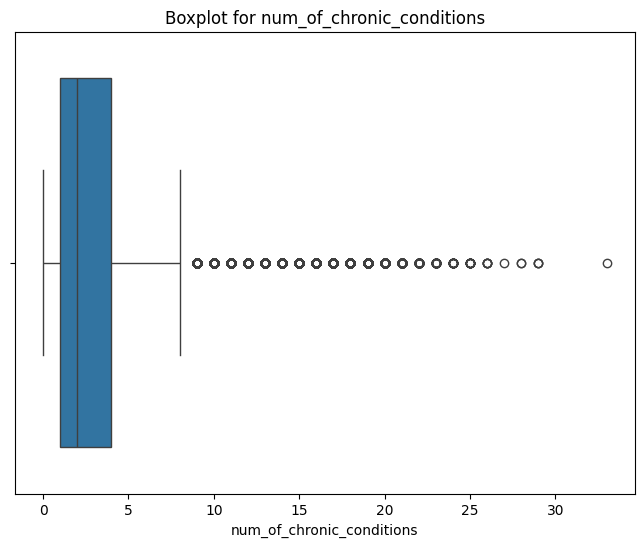

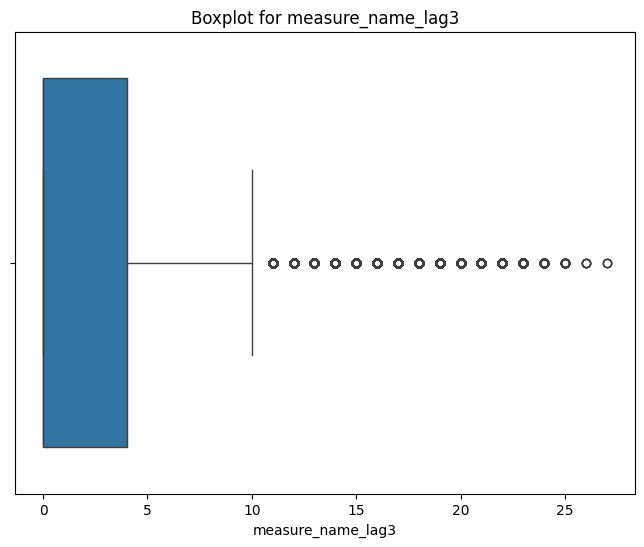

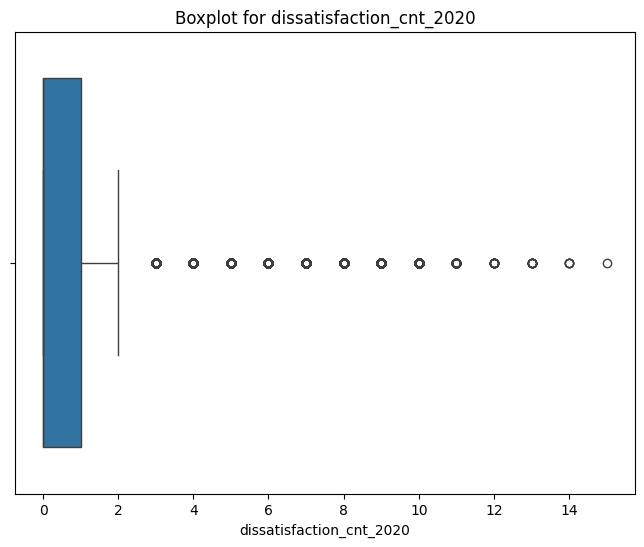

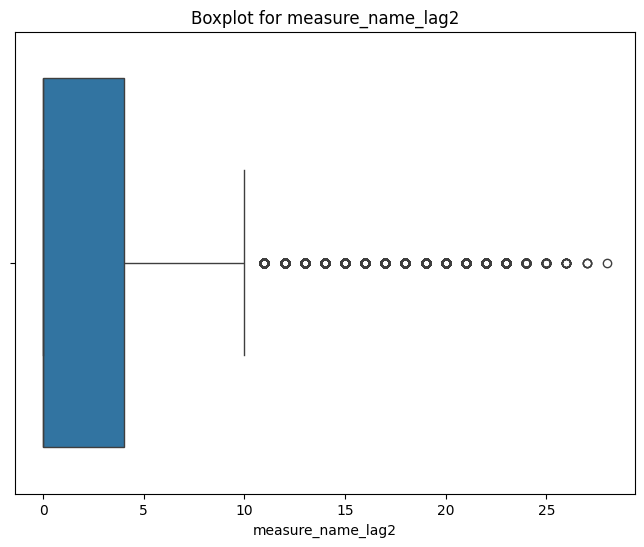

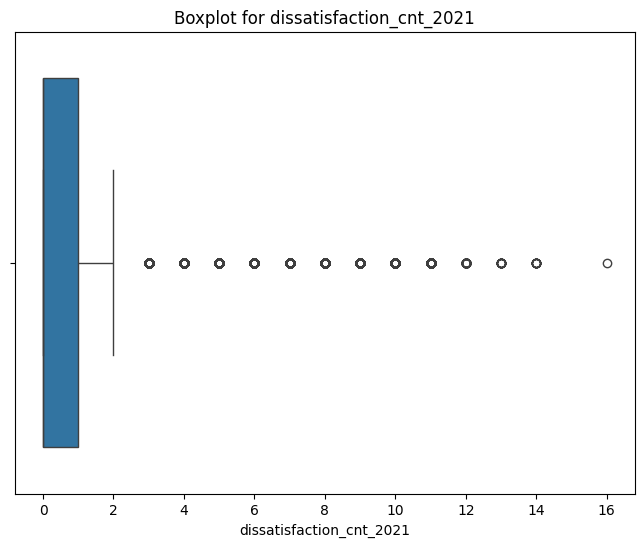

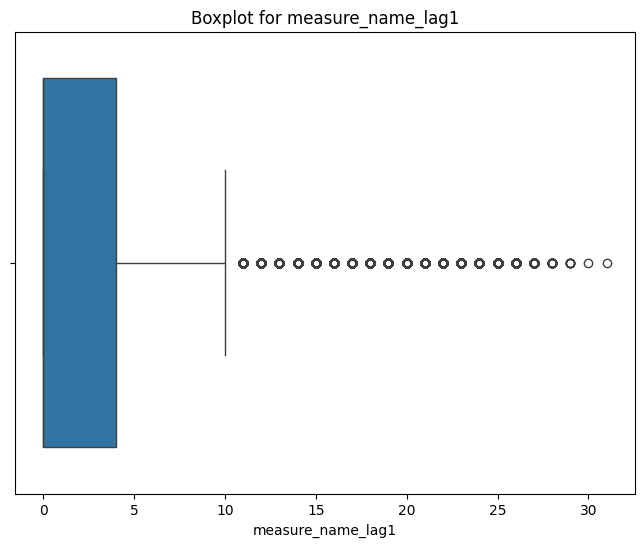

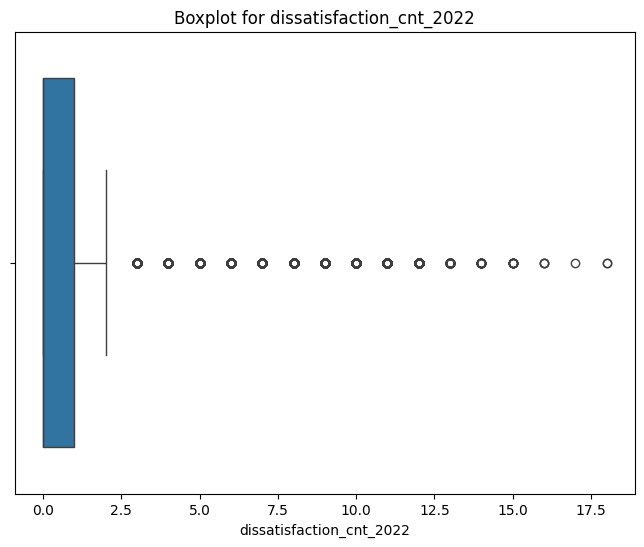

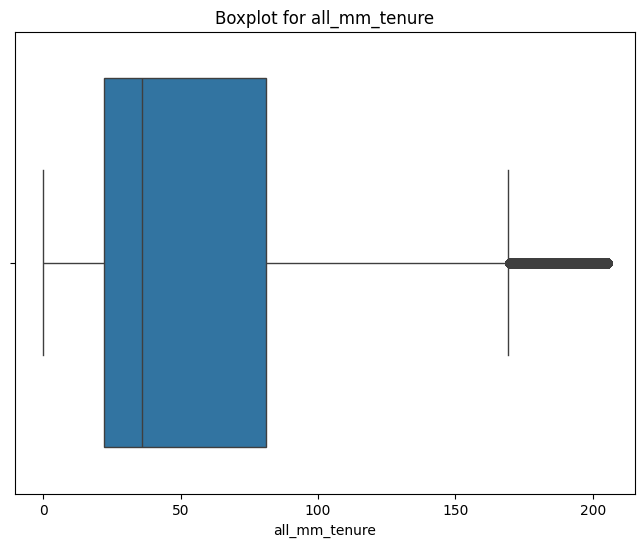

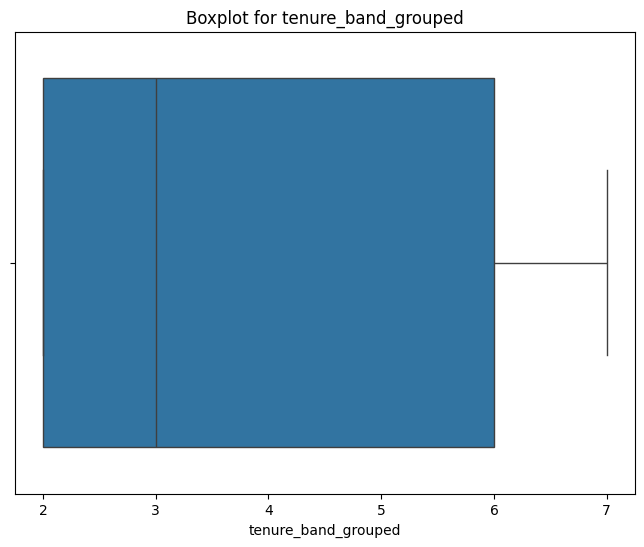

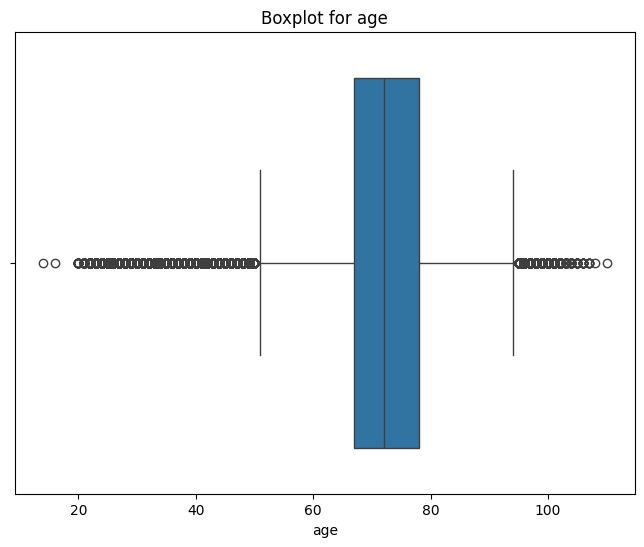

In [21]:
# prompt: boxplot for all cols

import matplotlib.pyplot as plt
import seaborn as sns

cols_to_include = ['num_of_chronic_conditions', 'measure_name_lag3',
       'dissatisfaction_cnt_2020', 'measure_name_lag2',
       'dissatisfaction_cnt_2021', 'measure_name_lag1',
       'dissatisfaction_cnt_2022', 'all_mm_tenure', 'tenure_band_grouped',
       'age']

# Assuming 'ndf' is your DataFrame
for column in cols_to_include:
  plt.figure(figsize=(8, 6))  # Adjust figure size as needed
  sns.boxplot(x=cont_df[column])
  plt.title(f'Boxplot for {column}')
  plt.show()


In [62]:
def rem_outliers(col):
    data = cont_df[col]
    iqr = data.quantile(.75) - data.quantile(.25)

    up_bound = data.quantile(.75) + (iqr * 1.5)
    lower_bound = data.quantile(.25) - (iqr * 1.5)
    print (lower_bound, iqr, up_bound)
    cont_df[col] = cont_df[col].apply(lambda x: up_bound if x >= up_bound else x)
    cont_df[col] = cont_df[col].apply(lambda y: lower_bound if y < lower_bound else y)
    print(col, ": outliers_updated")



In [54]:
iqr = data.quantile(.75) - data.quantile(.25)
up_bound = data.quantile(.75) + (iqr * 1.5)


In [58]:
rem_outliers("all_mm_tenure")

59.0 169.5 -66.5
all_mm_tenure : outliers_updated


In [59]:
rem_outliers("age")

11.0 94.5 50.5
age : outliers_updated


In [63]:
rem_outliers("num_of_chronic_conditions")

-3.5 3.0 8.5
num_of_chronic_conditions : outliers_updated


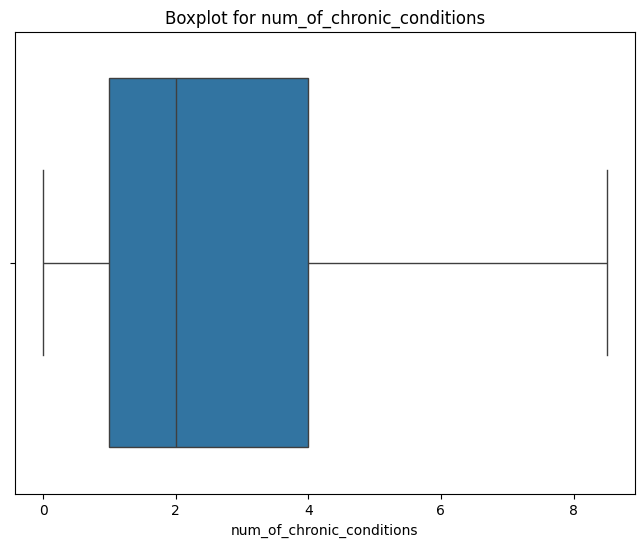

In [66]:
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
sns.boxplot(x=cont_df["num_of_chronic_conditions"])
plt.title(f'Boxplot for {"num_of_chronic_conditions"}')
plt.show()

In [33]:
cont_df.all_mm_tenure.max()

205

In [65]:
cols1 = ['cms_tot_ma_payment_amt',
       'cms_tot_partd_payment_amt', 'atlas_ffrpth14',
       'atlas_povertyallagespct']


for i in cols1 :
    rem_outliers(i)

-528.6500000000001 651.46 2077.19
cms_tot_ma_payment_amt : outliers_updated
-93.74 103.96 322.1
cms_tot_partd_payment_amt : outliers_updated
0.188249055 0.249998634 1.188243591
atlas_ffrpth14 : outliers_updated
1.299999999999999 6.800000000000001 28.5
atlas_povertyallagespct : outliers_updated


In [68]:
cols1 = ['cms_tot_ma_payment_amt',
       'cms_tot_partd_payment_amt', 'atlas_ffrpth14',
       'atlas_povertyallagespct']


for i in cols1 :
    rem_outliers(i)

-528.6500000000001 651.46 2077.19
cms_tot_ma_payment_amt : outliers_updated
-93.74 103.96 322.1
cms_tot_partd_payment_amt : outliers_updated
0.188249055 0.249998634 1.188243591
atlas_ffrpth14 : outliers_updated
1.299999999999999 6.800000000000001 28.5
atlas_povertyallagespct : outliers_updated


In [ ]:
cols1 = ['cms_tot_ma_payment_amt',
       'cms_tot_partd_payment_amt', 'atlas_ffrpth14',
       'atlas_povertyallagespct']


for i in cols1 :
    rem_outliers(i)

In [69]:
for i in cont_df.columns :
    rem_outliers(i)

-3.5 3.0 8.5
num_of_chronic_conditions : outliers_updated
-6.0 4.0 10.0
measure_name_lag3 : outliers_updated
-1.5 1.0 2.5
dissatisfaction_cnt_2020 : outliers_updated
-6.0 4.0 10.0
measure_name_lag2 : outliers_updated
-1.5 1.0 2.5
dissatisfaction_cnt_2021 : outliers_updated
-6.0 4.0 10.0
measure_name_lag1 : outliers_updated
-1.5 1.0 2.5
dissatisfaction_cnt_2022 : outliers_updated
-66.5 59.0 169.5
all_mm_tenure : outliers_updated
-4.0 4.0 12.0
tenure_band_grouped : outliers_updated
50.5 11.0 94.5
age : outliers_updated
0.0 0.0 0.0
total_ip_health_issues_admit_days_pmpm : outliers_updated
0.0 0.0 0.0
nonpar_coins_pmpm_cost : outliers_updated
-8.681249999999999 5.7875 14.468749999999998
total_coins_pmpm_cost : outliers_updated
0.0 0.0 0.0
nonpar_cob_paid_pmpm_cost : outliers_updated
0.0 0.0 0.0
total_cob_paid_pmpm_cost : outliers_updated
0.0 0.0 0.0
nonpar_copay_pmpm_cost : outliers_updated
-69.99999999999994 48.3333333333333 123.33333333333324
total_copay_pmpm_cost : outliers_updated
-65.

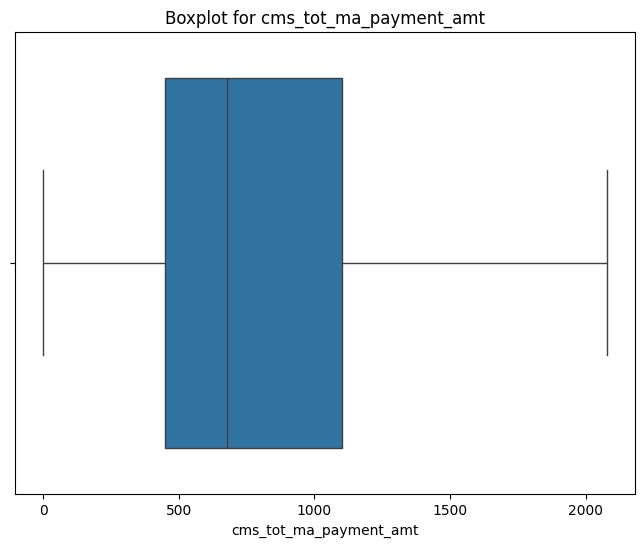

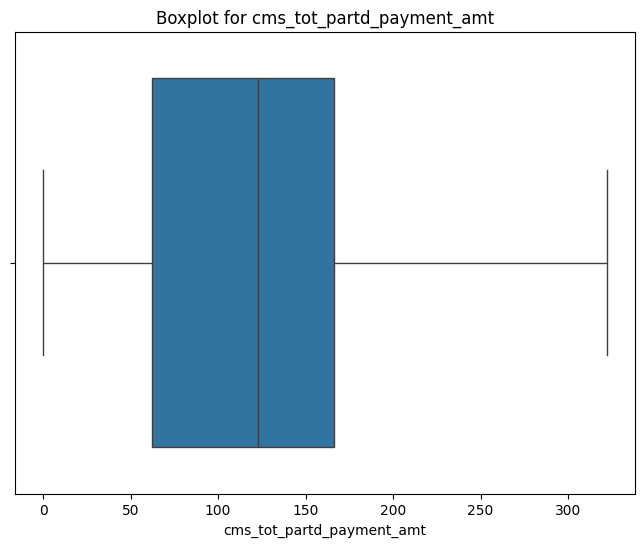

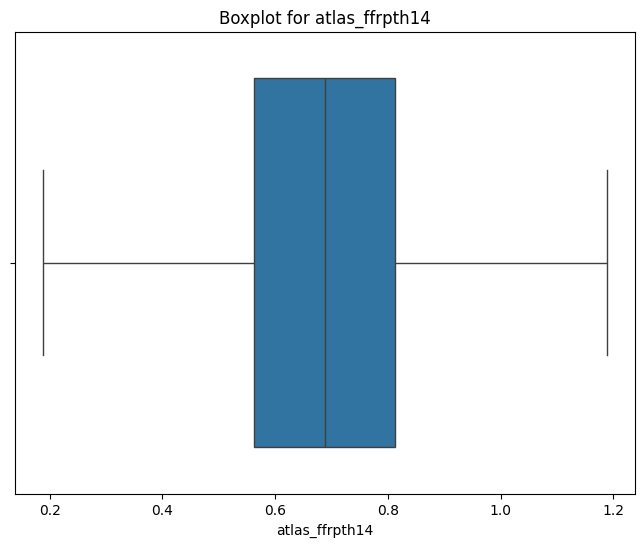

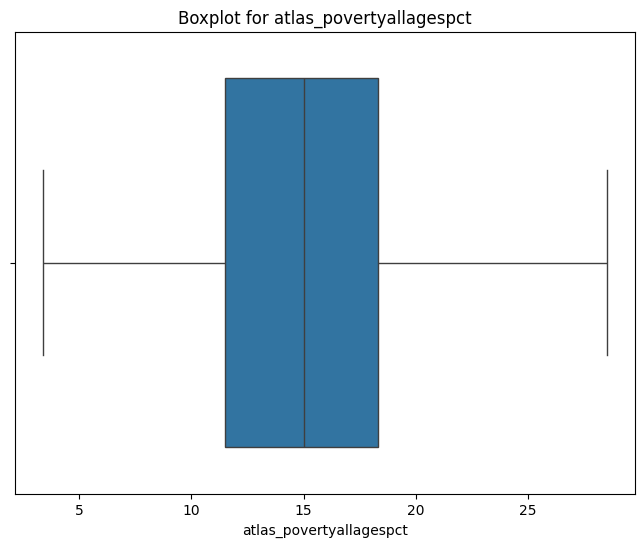

In [67]:
cols1 = ['cms_tot_ma_payment_amt',
       'cms_tot_partd_payment_amt', 'atlas_ffrpth14',
       'atlas_povertyallagespct']

for column in cols1:
  plt.figure(figsize=(8, 6))  # Adjust figure size as needed
  sns.boxplot(x=cont_df[column])
  plt.title(f'Boxplot for {column}')
  plt.show()
